## Đừng đánh giá thấp việc lập trình Masking

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function to visualize
def scaled_dot_product_attention(q, k, v, mask=None):
    matmul_qk = torch.matmul(q, k.transpose(-2, -1))
    dk = torch.tensor(k.shape[-1], dtype=torch.float32)
    scaled_attention_logits = matmul_qk / torch.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    attention_weights = F.softmax(scaled_attention_logits, dim=-1)
    output = torch.matmul(attention_weights, v)

    return output, attention_weights, matmul_qk, scaled_attention_logits



In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function to visualize
def scaled_dot_product_attention(q, k, v, mask=None):
    matmul_qk = torch.matmul(q, k.transpose(-2, -1))
    dk = torch.tensor(k.shape[-1], dtype=torch.float32)
    scaled_attention_logits = matmul_qk / torch.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    attention_weights = F.softmax(scaled_attention_logits, dim=-1)
    output = torch.matmul(attention_weights, v)

    return output, attention_weights, matmul_qk, scaled_attention_logits

In [ ]:

# Create random tensors for q, k, v
batch_size = 1
seq_len_q = 5
seq_len_k = 5
d_model = 8

q = torch.rand((batch_size, seq_len_q, d_model))
k = torch.rand((batch_size, seq_len_k, d_model))
v = torch.rand((batch_size, seq_len_k, d_model))

In [ ]:
# Create random tensors for q, k, v
batch_size = 1
seq_len_q = 5
seq_len_k = 5
d_model = 8

q = torch.rand((batch_size, seq_len_q, d_model))
k = torch.rand((batch_size, seq_len_k, d_model))
v = torch.rand((batch_size, seq_len_k, d_model))

# Create a random mask
mask = torch.tril(torch.ones(seq_len_q, seq_len_k)).unsqueeze(0)


### 1. Demo masking cho mẫu tam giác

In [ ]:
mask

tensor([[[1., 0., 0., 0., 0.],
         [1., 1., 0., 0., 0.],
         [1., 1., 1., 0., 0.],
         [1., 1., 1., 1., 0.],
         [1., 1., 1., 1., 1.]]])

In [ ]:

# Get the attention outputs
output, attention_weights, matmul_qk, scaled_attention_logits = scaled_dot_product_attention(q, k, v, mask)


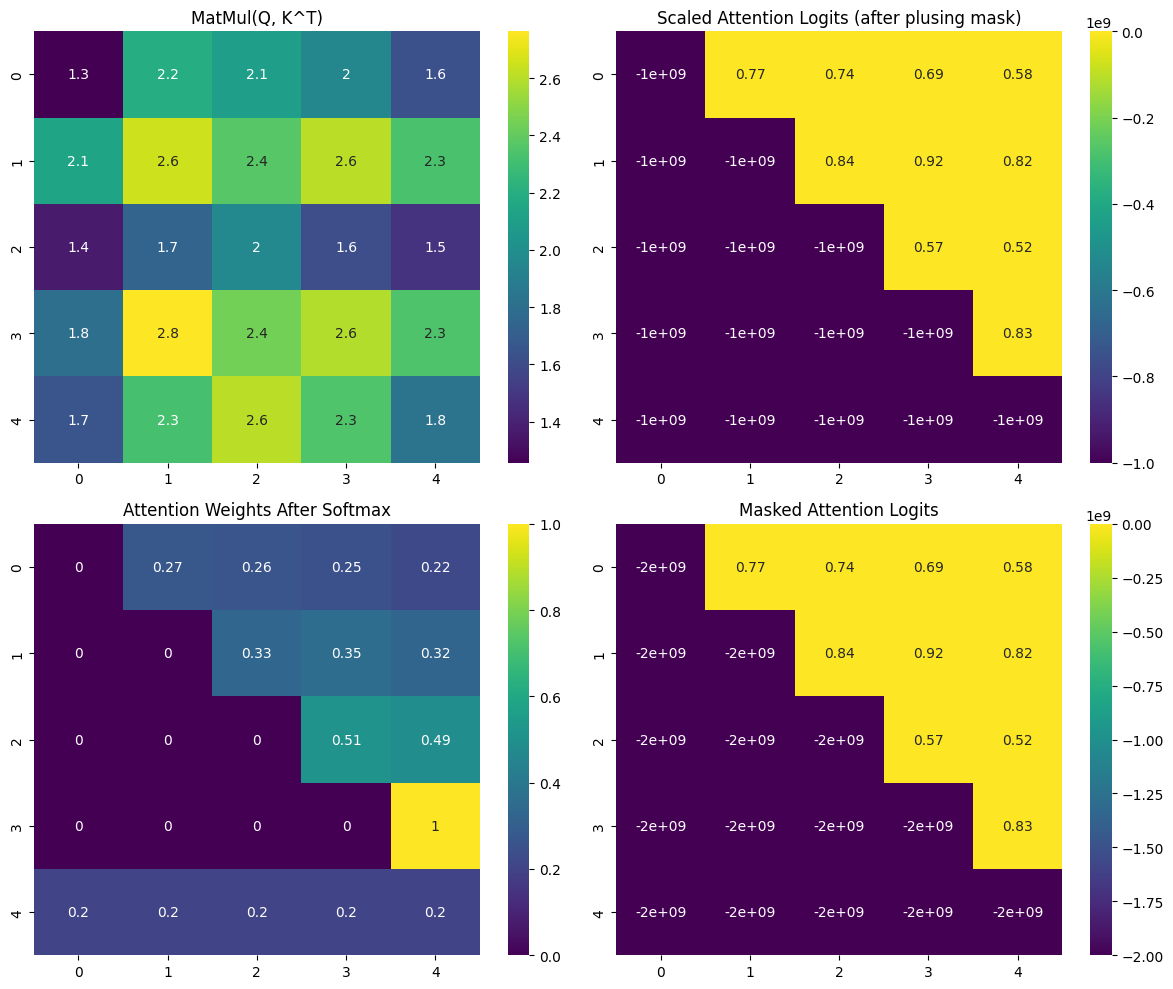

In [ ]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(matmul_qk.squeeze().detach().numpy(), ax=axes[0, 0], annot=True, cmap="viridis")
axes[0, 0].set_title("MatMul(Q, K^T)")

sns.heatmap(scaled_attention_logits.squeeze().detach().numpy(), ax=axes[0, 1], annot=True, cmap="viridis")
axes[0, 1].set_title("Scaled Attention Logits (after plusing mask)")

sns.heatmap(attention_weights.squeeze().detach().numpy(), ax=axes[1, 0], annot=True, cmap="viridis")
axes[1, 0].set_title("Attention Weights After Softmax")

# Apply mask and show the masked logits
masked_logits = scaled_attention_logits.squeeze().detach().numpy() + (mask.squeeze().numpy() * -1e9)
sns.heatmap(masked_logits, ax=axes[1, 1], annot=True, cmap="viridis")
axes[1, 1].set_title("Masked Attention Logits")

plt.tight_layout()
plt.show()